In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Project\Personal\end-to-end-ml-project"


file_in_dataset = "House_Rent_Dataset.csv"
# Load the latest version
housing = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/house-rent-prediction-dataset",
  file_in_dataset,
 
)

print("First 5 records:\n", housing.head())

print("======================")
housing.info()


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_32365/1476248253.py:5: SyntaxWarning: invalid escape sequence '\P'
  file_path = "Project\Personal\end-to-end-ml-project"
/home/luwukien/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_32365/1476248253.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  housing = kagglehub.load_dataset(


First 5 records:
     Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         

In [3]:
object_columns = housing.select_dtypes(include=['object'])

for column in object_columns:
  print(housing[column].value_counts(), "\n")

Posted On
2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-27    125
             ... 
2022-04-25      6
2022-04-24      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: count, Length: 81, dtype: int64 

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
6 out of 29          1
28 out of 31         1
23 out of 30         1
4 out of 30          1
13 out of 25         1
Name: count, Length: 480, dtype: int64 

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64 

Area Locality
Bandra West                       37
Gachibowli                        29
Electronic City                   24
Miyapur, NH 9                     22
Velachery                         22
                                  ..
Hoysala Nagar                      1
Nagarabhavi                        1
Shamanna Garden, Wilson Garden     1
Jagadis

In [4]:
housing.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


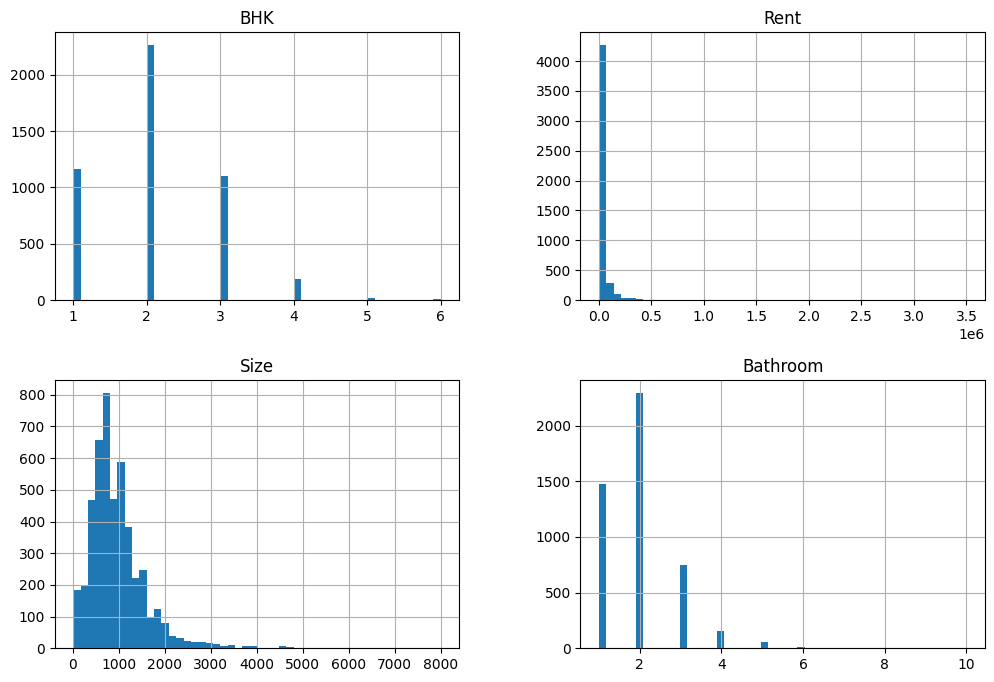

In [5]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()
